# 12AR_cooccurence matrix plots

3/16/2021
make motifx motif matrix cooccurence plots


In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
save_dir = '../data/processed/fig4_modelling/cooccurence_matrix_plots/'


In [17]:
get_count_df = function(filepath,tfs){
    
    df = read.csv(filepath,
            stringsAsFactor=F)
    df = df%>%
        separate(X,c('tf1','-','tf2'),sep='[:]')%>%
        mutate(tot_count = pro_pro_count+loop_loop_count)%>%
        filter((tf1 %in% tfs)&(tf2%in% tfs))
    df2 = df
    df2  = df %>%
        mutate(tf1_c = tf1)%>%
        mutate(tf2_c = tf2)%>%
        mutate(tf1 = tf2_c)%>%
        mutate(tf2 = tf1_c)%>%
        select(-tf1_c, -tf2_c)
    df = rbind(df, df2)
    df = arrange(df,tf2,tf1)
    return(df)
}

get_countinfo_df = function(filepath,tfs,vocab_to_keep=c()){
    
    df = read.csv(filepath,
            stringsAsFactor=F)
    if (length(vocab_to_keep)>0){
        print('filtering vocabs')
        df = filter(df, tf_key %in% vocab_to_keep)
        
    }
    df = df%>%
        separate(tf_key,c('tf1','-','tf2'),sep='[:]')%>%
        filter((tf1 %in% tfs)&(tf2%in% tfs))
    df2 = df
    df2  = df %>%
        mutate(tf1_c = tf1)%>%
        mutate(tf2_c = tf2)%>%
        mutate(tf1 = tf2_c)%>%
        mutate(tf2 = tf1_c)%>%
        select(-tf1_c, -tf2_c)
    df = rbind(df, df2)
    df = arrange(df,tf2,tf1)
    df = drop_na(df)
    return(df)
}

In [5]:
mpra_df = read.csv('../data/processed/fig4_modelling/vocab_sum_final/for_ld/vocab_instances20_seqs_sel.csv',
                  stringsAsFactor=F)
unique(mpra_df$tissue)
mpra_tfs = unique(c(mpra_df$vocab1,mpra_df$vocab2))
length(mpra_tfs)
colon_tfs = unique(c(filter(mpra_df,tissue=='Colon')$vocab1,
                   filter(mpra_df,tissue=='Colon')$vocab2))
length(colon_tfs)

krt_tfs = unique(c(filter(mpra_df,tissue=='GDSD6')$vocab1,
                   filter(mpra_df,tissue=='GDSD6')$vocab2))
length(krt_tfs)

gm_tfs = unique(c(filter(mpra_df,tissue=='GM12878')$vocab1,
                   filter(mpra_df,tissue=='GM12878')$vocab2))
length(gm_tfs)

mc_tfs = unique(c(filter(mpra_df,tissue=='Melanocytes')$vocab1,
                   filter(mpra_df,tissue=='Melanocytes')$vocab2))
length(mc_tfs)

scc_tfs = unique(c(filter(mpra_df,tissue=='SCC')$vocab1,
                   filter(mpra_df,tissue=='SCC')$vocab2))
length(scc_tfs)

mm_tfs = unique(c(filter(mpra_df,tissue=='MM')$vocab1,
                   filter(mpra_df,tissue=='MM')$vocab2))
length(mm_tfs)





[1] "Colon"       "GDSD6"       "GM12878"     "Melanocytes" "SCC"        
[6] "MM"

[1] 123

[1] 31

[1] 36

[1] 27

[1] 21

[1] 32

[1] 19

## for KRT vs SCC stuff

In [6]:
skin_tfs = unique(c(scc_tfs,krt_tfs))
length(skin_tfs)

[1] 63

KLF4::TP63, JUND::TP63, JUND::KLF4, JUNB::TP63, JUNB::KLF4, JUN::TP63, JUN::KLF4, FOS::TP63, FOS::JUN, FOS::JUNB, FOS::JUND, FOS::KLF4, ATF2::MAF, ATF2::MAFB, CEBPB::JUN



In [8]:
vocabs_to_keep = c('KLF4::TP63','JUND::TP63', 'JUND::KLF4', 
                   'JUNB::TP63', 'JUNB::KLF4', 'JUN::TP63', 'JUN::KLF4', 
                   'FOS::TP63', 'FOS::JUN', 'FOS::JUNB', 'FOS::JUND', 'FOS::KLF4', 
                   'ATF2::MAF', 'ATF2::MAFB', 'CEBPB::JUN'
)

In [25]:
df_manual = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_pair_filt.csv',
             c("KLF4","TP63","JUN","JUNB","JUND","FOS","FOSL2","ATF2","MAF","MAFB","CEBPB"))#,
#                             vocab_to_keep = vocabs_to_keep)
# df_manual
# df_manual = filter(df_manual, tf_key %in% vocabs_to_keep)
dim(df_manual)

[1] 110  17

[1] 50

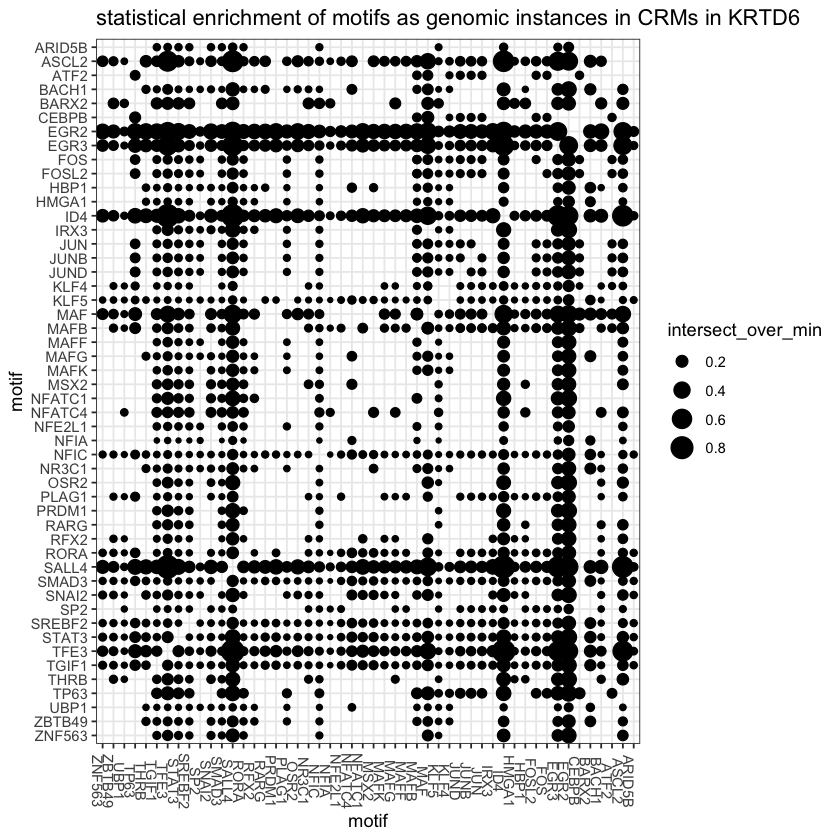

In [26]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_pair_filt_unique.csv',
             mpra_tfs)
df = rbind(df, df_manual)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in KRTD6')
ggsave(paste0(save_dir,'KRTD6_enrichment_dotplot.eps'),
      width=8.5,height=7)

[1] 48

Saving 7 x 7 in image



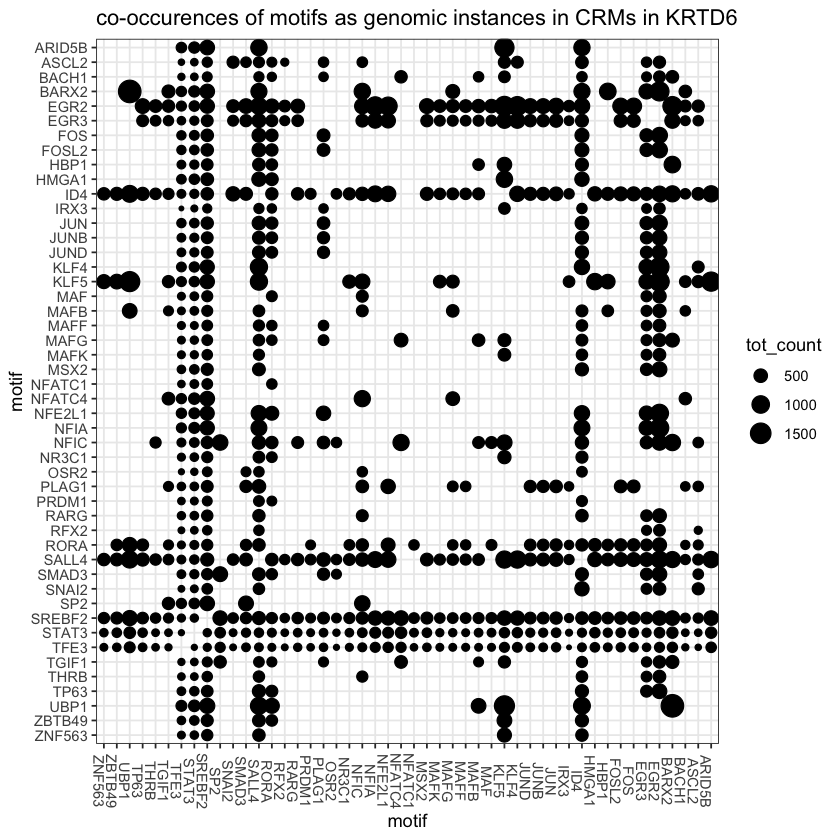

In [19]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in KRTD6')
ggsave(paste0(save_dir,'KRTD6_cooccurence_dotplot.eps'))

In [20]:
df

tf1    - tf2    pro_pro_count
1   ID4      ARID5B 18           
2   KLF5     ARID5B 19           
3   SALL4    ARID5B  9           
4   SREBF2   ARID5B  5           
5   STAT3    ARID5B  4           
6   TFE3     ARID5B  4           
7   EGR2     ASCL2   9           
8   EGR3     ASCL2   2           
9   ID4      ASCL2  17           
10  KLF4     ASCL2   8           
11  KLF5     ASCL2  10           
12  NFIC     ASCL2   4           
13  PLAG1    ASCL2   3           
14  RFX2     ASCL2   2           
15  RORA     ASCL2   3           
16  SALL4    ASCL2   8           
17  SMAD3    ASCL2   3           
18  SNAI2    ASCL2  17           
19  SREBF2   ASCL2   3           
20  STAT3    ASCL2   2           
21  TFE3     ASCL2   0           
22  BARX2    BACH1   7           
23  EGR2     BACH1   8           
24  EGR3     BACH1   2           
25  ID4      BACH1   2           
26  KLF5     BACH1   2           
27  MAFB     BACH1   4           
28  NFATC4   BACH1  10           
29  PLAG1    BACH1   2           
30  RORA     BACH1   2           
⋮   ⋮      ⋮ ⋮      ⋮            
669 EGR2     TP63   11           
670 EGR3     TP63    3           
671 ID4      TP63    5           
672 RORA     TP63    3           
673 SALL4    TP63    4           
674 SREBF2   TP63    5           
675 STAT3    TP63    3           
676 TFE3     TP63    1           
677 BARX2    UBP1   75           
678 ID4      UBP1   23           
679 KLF5     UBP1   45           
680 MAFB     UBP1    6           
681 RORA     UBP1   15           
682 SALL4    UBP1   22           
683 SREBF2   UBP1   12           
684 STAT3    UBP1    8           
685 TFE3     UBP1    4           
686 ID4      ZBTB49  1           
687 KLF5     ZBTB49  4           
688 RORA     ZBTB49  2           
689 SALL4    ZBTB49  2           
690 SREBF2   ZBTB49  3           
691 STAT3    ZBTB49  3           
692 TFE3     ZBTB49  3           
693 ID4      ZNF563 10           
694 KLF5     ZNF563 12           
695 SALL4    ZNF563  4           
696 SREBF2   ZNF563  2           
697 STAT3    ZNF563  3           
698 TFE3     ZNF563  0           
    pro_pro_genes                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1   CERS3|CLDND1|CUX1|DDX5|EMD|FRMD8|HES2|HEXIM1|HILPDA|IL36G|MED31|MRPL21|MRPS7|MTFR1|SLC9A1|SNRPD2|SPRR2D|TAGLN2                                                                                                                                                                                                                                                                                                                                                                            
2   ACVR1B|AP2S1|ATG9A|CCDC69|CUX1|DDX5|EMD|ESYT2|GFOD1|HES2|KLHL21|LTBR|OSBPL2|OSBPL3|PHF13|S100A11|SERPINB13|SNRPD2|TPM3                                                                                                                                                                                                                                                                                                                                                                    
3   CUX1|DDX5|EMD|ESYT2|KMT2E|MRPS7|OSBPL2|OSBPL3|SRSF5                                                                                                                                                                                                                                                                                                                                                                                                                    

[1] 58

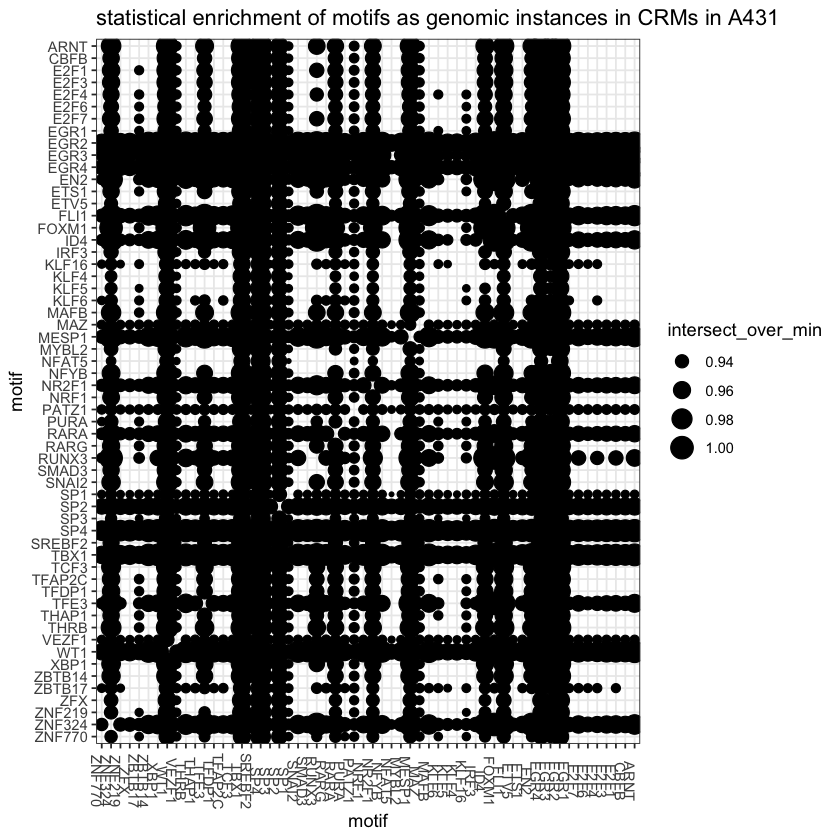

In [21]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs_scc/expr_cancer_pair_filt_unique.csv',
             mpra_tfs)
df = df%>%filter(log_pval_bonf>75)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in A431')
ggsave(paste0(save_dir,'A431-CTRL_enrichment_dotplot.eps'),
      width=12,height=12)

[1] 58

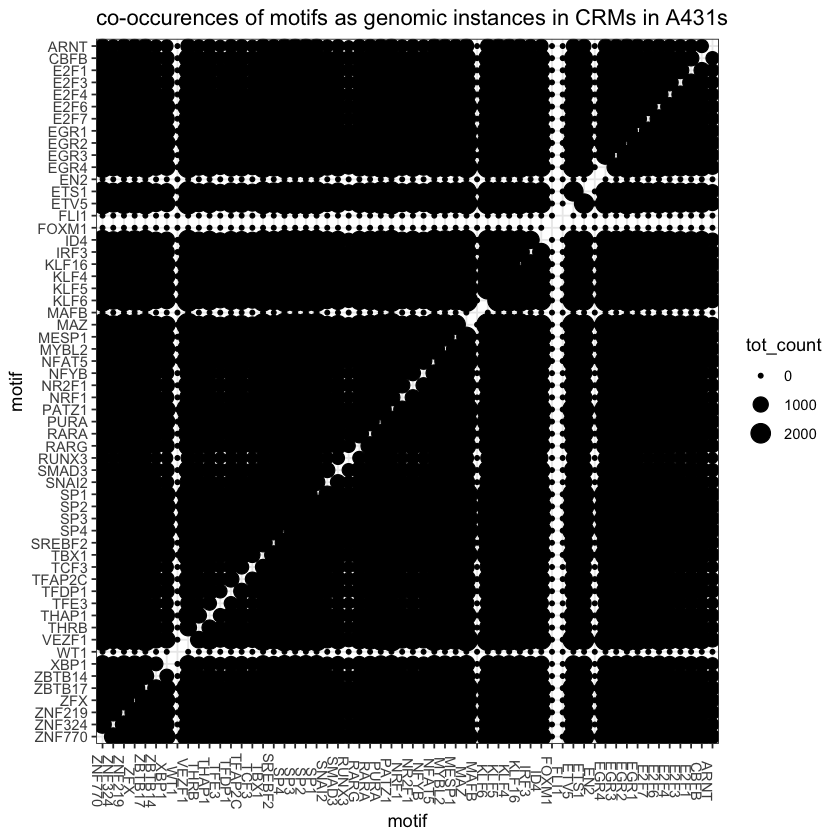

In [22]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs_scc/expr_A431-CTRLi_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in A431s')
ggsave(paste0(save_dir,'A431-CTRLi_cooccurence_dotplot.eps'),
      width=9,height=9)


## for MC vs MM stuff

In [23]:
# mel_tfs = unique(c(mc_tfs,mm_tfs,skin_tfs))
# length(mel_tfs)

[1] 29

Saving 7 x 7 in image



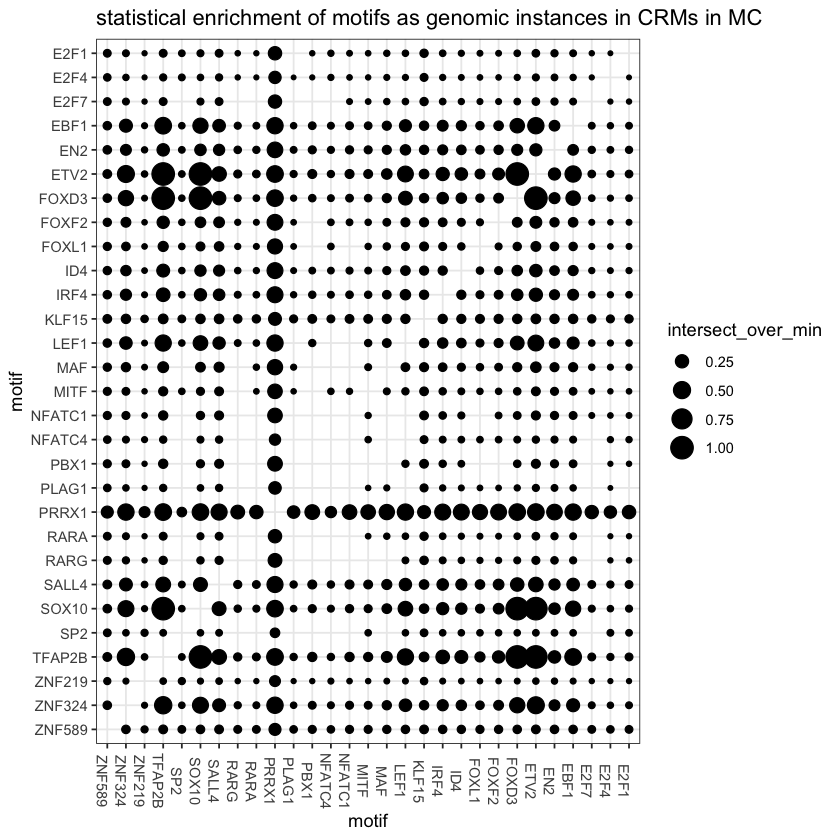

In [24]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs/expr_Melanocytes_pair_filt_unique.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in MC')
ggsave(paste0(save_dir,'MC_enrichment_dotplot.eps'))

[1] 29

Saving 7 x 7 in image



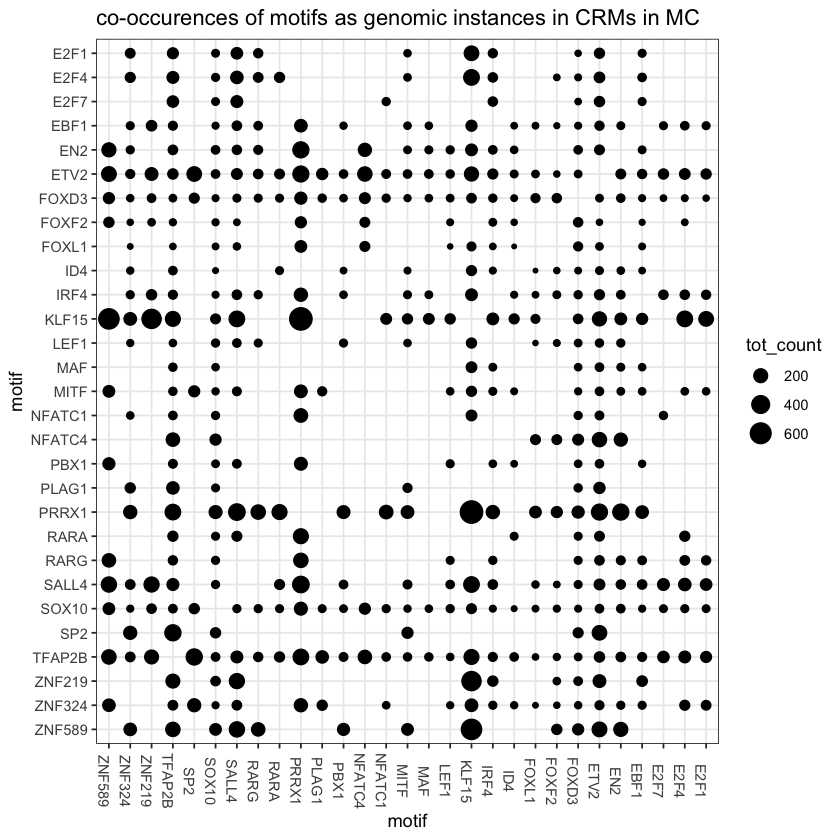

In [25]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs/expr_Melanocytes_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in MC')
ggsave(paste0(save_dir,'MC_cooccurence_dotplot.eps'))

[1] 33

Saving 7 x 7 in image



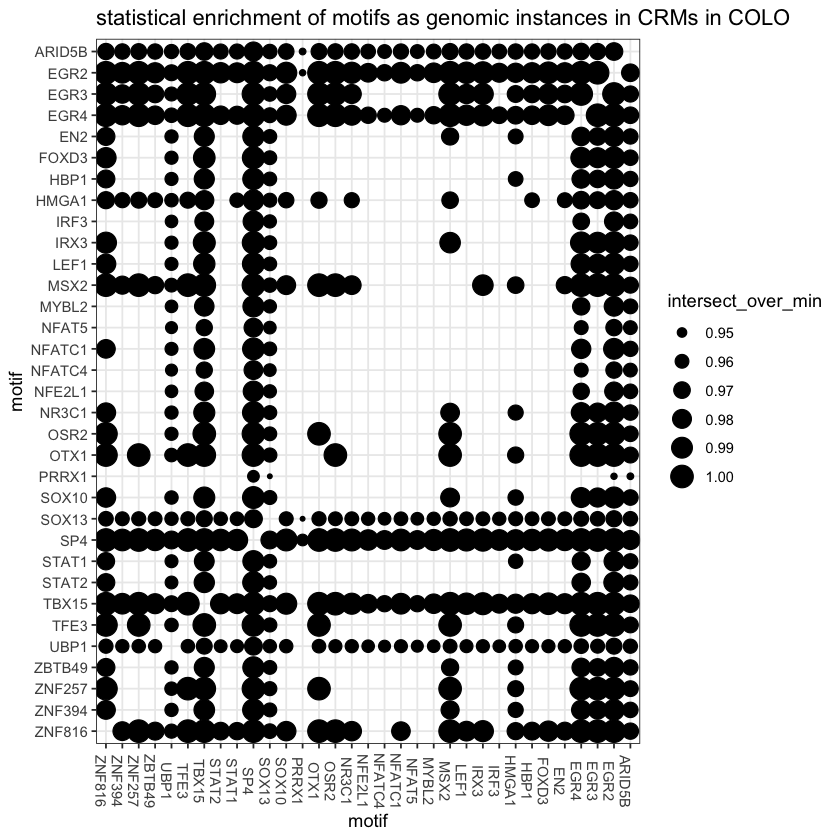

In [26]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs_mm/expr_cancer_pair_filt_unique.csv',
             mpra_tfs)
df = df%>%filter(log_pval_bonf>75)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in COLO')
ggsave(paste0(save_dir,'COLO_enrichment_dotplot.eps'))

[1] 58

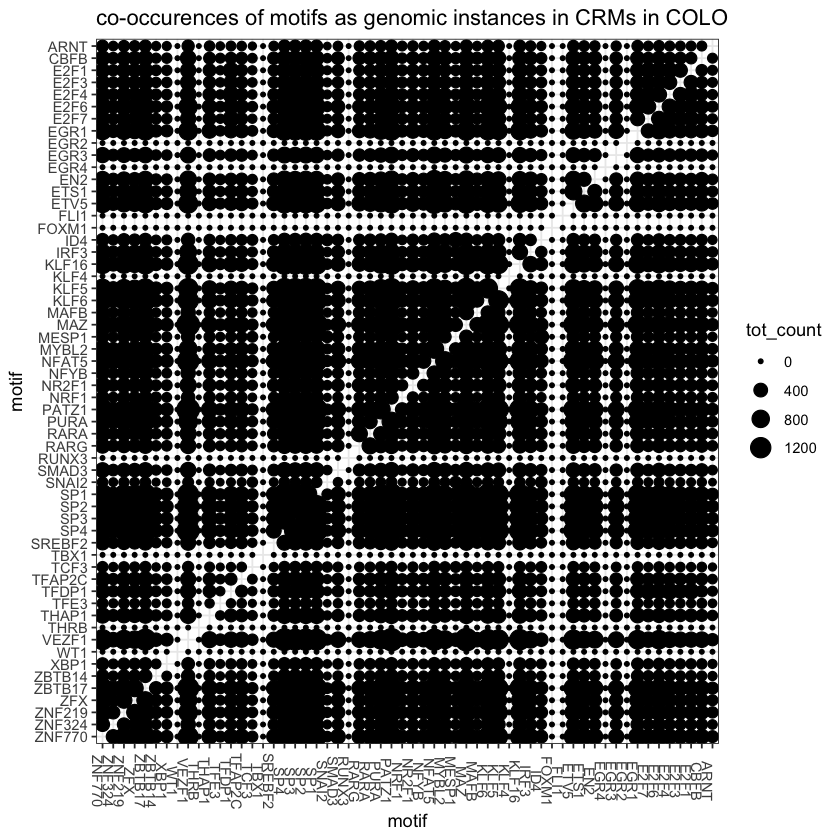

In [27]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs_mm/expr_COLO-SCR-DMSO_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in COLO')
ggsave(paste0(save_dir,'COLO_cooccurence_dotplot.eps'),
      width=9,height=9)

# others colon/gms

[1] 42

Saving 7 x 7 in image



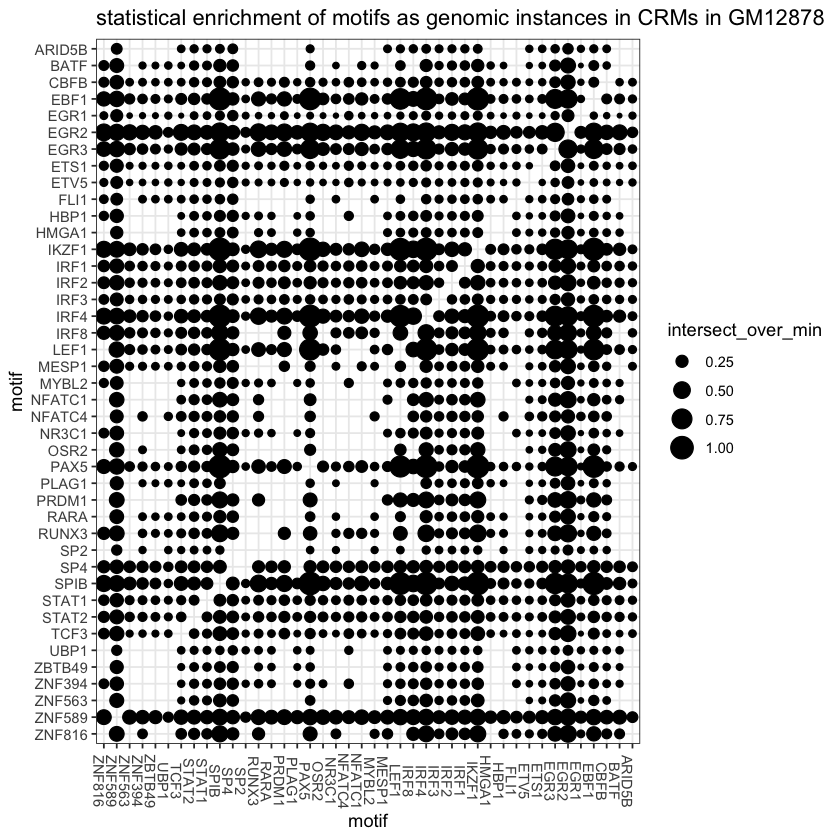

In [28]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs/expr_GM12878_pair_filt_unique.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in GM12878')
ggsave(paste0(save_dir,'GM12878_enrichment_dotplot.eps'))

[1] 42

Saving 7 x 7 in image



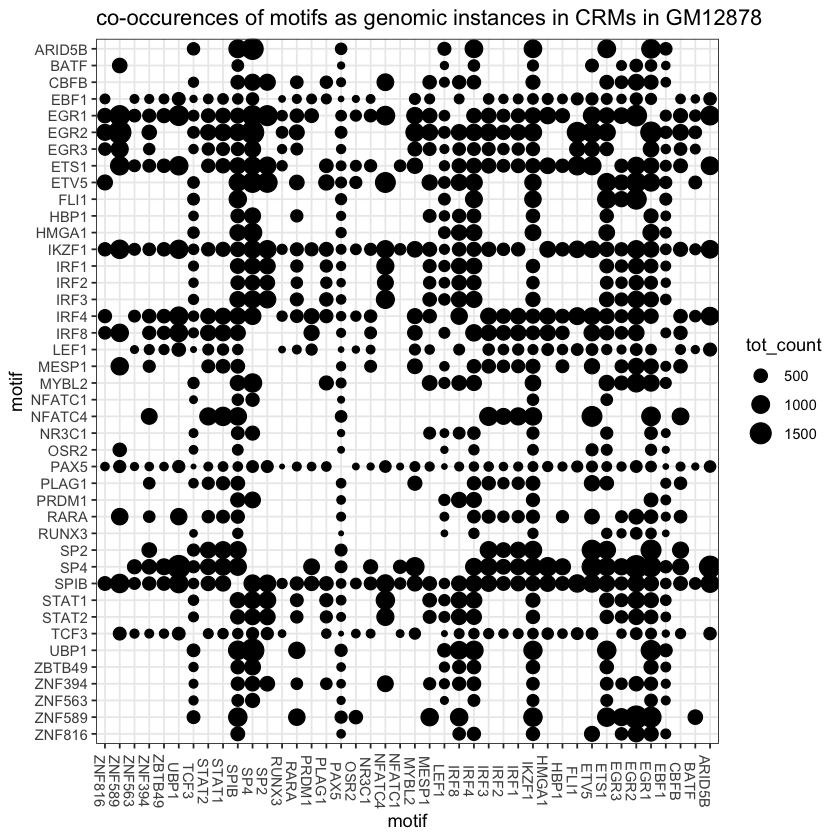

In [29]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs/expr_GM12878_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in GM12878')
ggsave(paste0(save_dir,'GM12878_cooccurence_dotplot.eps'))

[1] 33

Saving 7 x 7 in image



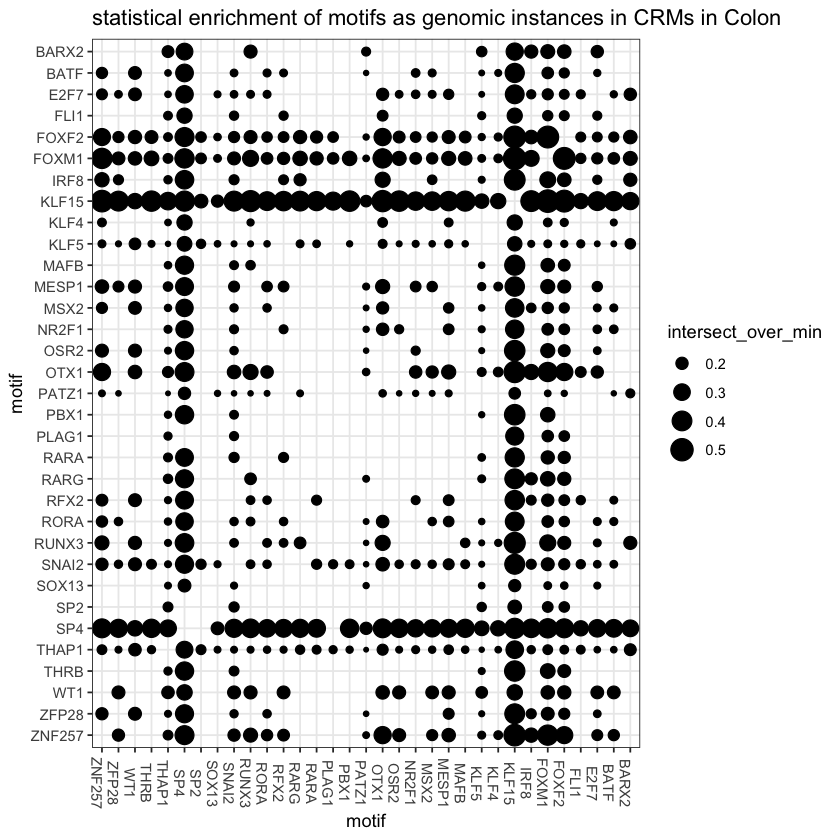

In [30]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_pair_filt_unique.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in Colon')
ggsave(paste0(save_dir,'Colon_enrichment_dotplot.eps'))

[1] 33

Saving 7 x 7 in image



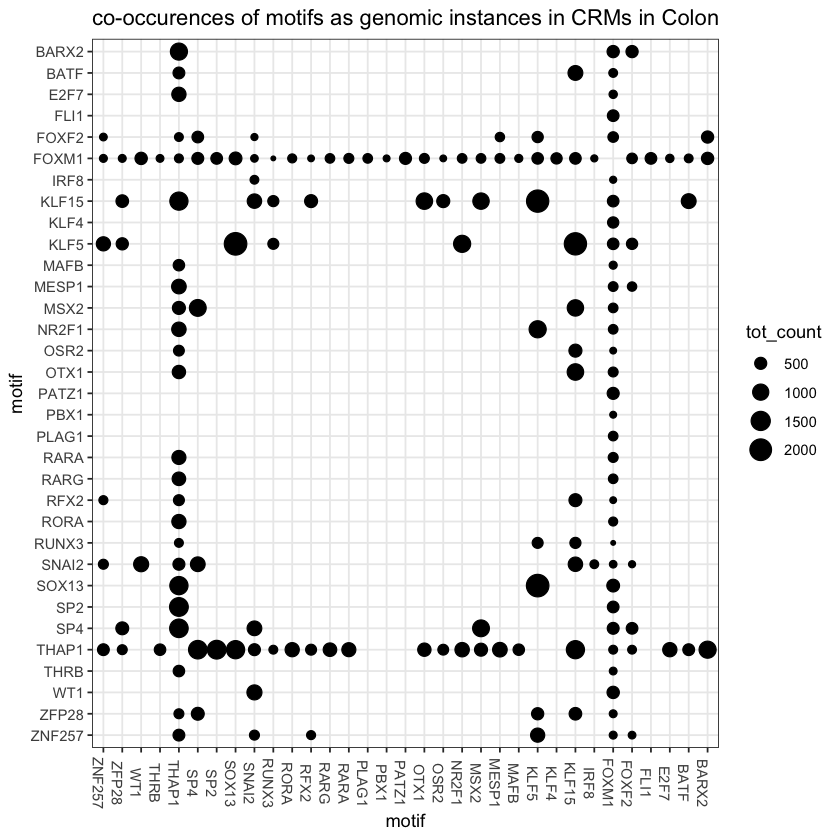

In [31]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in Colon')
ggsave(paste0(save_dir,'Colon_cooccurence_dotplot.eps'))

# make 3D plots

In [32]:
# install.packages('plotly')\
library(plotly)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [33]:
length(mpra_tfs)

[1] 123

In [34]:
files_list = list.files( '../data/processed/fig4_modelling/tf_tf_pairs/', pattern='[e]*_loop_type.csv$')
files_list[1:17]

[1] "expr_Airway_loop_type.csv"      "expr_Astrocytes_loop_type.csv" 
 [3] "expr_Bladder_loop_type.csv"     "expr_Colon_loop_type.csv"      
 [5] "expr_Esophageal_loop_type.csv"  "expr_GDSD0_loop_type.csv"      
 [7] "expr_GDSD3_loop_type.csv"       "expr_GDSD6_loop_type.csv"      
 [9] "expr_GM12878_loop_type.csv"     "expr_HMEC_loop_type.csv"       
[11] "expr_Melanocytes_loop_type.csv" "expr_Ovarian_loop_type.csv"    
[13] "expr_Pancreas_loop_type.csv"    "expr_Prostate_loop_type.csv"   
[15] "expr_Renal_loop_type.csv"       "expr_Thyroid_loop_type.csv"    
[17] "expr_Uterine_loop_type.csv"

In [35]:
head(read.csv(paste0( '../data/processed/fig4_modelling/tf_tf_pairs/',files_list[1])))

X              pro_pro_count pro_pro_genes loop_loop_count
1 ARID3A::NKX2-1 0                            7             
2 ARID3A::NR1D1  0                           17             
3 ARID3A::SIX2   0                           27             
4 ARID3A::SOX2   2             HOMER1|HSPA4  36             
5 ARID3A::TBX1   0                           48             
6 ARID5B::NKX2-1 0                           72             
  loop_loop_genes                                                                                                                                                                                                                                                                                                                                                                                                                                           
1 ATF3|CAPZA2|NEDD9|PHLDA1|SEC31A|TXN2|ZFP36L1                                                                                                                                                                                                                                                                                                                                                                                                              
2 ATF3|AVPI1|DUSP1|EHBP1|INHBA|IRS1|KCNMA1|MMP1|MUL1|NPTN|PHLDA1|PSMD5|PTP4A2|SCEL|SLC2A1|SLC33A1|TRIB1                                                                                                                                                                                                                                                                                                                                                     
3 ACP2|ATG5|B4GALT5|BPGM|CTPS1|DDX47|DUSP1|EHBP1|GFOD1|GLUL|HSF2BP|LYPD3|MUL1|PACSIN3|PTP4A2|PTPN14|RAP2B|RRP1B|RTKN|SERP2|SERPINE1|SLC20A1|SPATS2L|TRIB1|WDR54|ZFP36L1|ZNRF2                                                                                                                                                                                                                                                                               
4 ANXA2|ARHGAP21|ATF3|ATG5|BPGM|CAPZA2|CISD1|DDX47|DLG1|EVA1C|FBXO7|GFOD1|HSPA4|INHBA|IRS1|KYNU|NEDD9|PAWR|PCYT1A|PHLDA1|PTPN14|PXDC1|RAB25|RAP2B|RTKN|SERINC2|SERPINE1|SH3BP4|SLC2A1|SLC33A1|SRRT|TAF1B|WDR54|WWTR1|ZBED2|ZNRF2                                                                                                                                                                                                                            
5 ACP2|ACTN4|ANXA2|ARHGEF2|ATF3|BPGM|CAPZA2|CTPS1|CUL4B|DDX47|DUSP1|EIF2AK4|EMP1|ENSA|ERRFI1|FOPNL|GTF3C6|HSF2BP|HSPA4|INPP5D|KPNA1|KRTCAP3|LYPD3|NDUFB7|NPTN|NRARP|PACSIN3|PCYT1A|PTP4A2|PTPN12|PTPN14|PXDC1|RAB25|RAP2B|RND3|RRP1B|SCEL|SERPINE1|SH3BP4|SRRT|STRIP1|TAF1B|TECR|TPMT|TPX2|TXN2|USP31|ZNRF2                                                                                                                                                 
6 ACTB|APOO|ATF3|CAPZA2|CCDC115|CSRNP1|CUEDC1|DNTTIP1|DUSP10|EEF1A1|EML3|ETS2|FANCE|FBXL18|FUT11|GRB2|HBEGF|IDH3A|IMP4|INSIG1|INTS1|ITGB4|KIF21A|KRT14|KRT17|LAMC2|MBP|MED21|MICAL2|NCLN|NDRG1|NEDD9|PCSK9|PDLIM5|PFN1|PHLDA1|POLR2A|POLR3D|PPARD|PPM1F|PSMG3|PXN|RHOC|RIPK1|RPL37|RPS16|SAT1|SCD5|SDC4|SEC31A|SERPINE2|SLC26A2|SLC3A2|SLMAP|SMPD4|SOX4|SUPT5H|TFAP2A|TMEM223|TNC|TNFAIP3|TSC22D2|TTC9C|TXN2|UBXN1|UNK|UXS1|VEZF1|ZBTB4|ZDHHC7|ZFP36|ZFP36L1
  pro_loop_count pro_loop_genes    loop_pro_count loop_pro_genes
1 1              TXN2              0                            
2 1              AVPI1             1              MUL1          
3 0                                0                            
4 3              EIF1|HSPA4|ZBED2  2              HSPA4|TGFBI   
5 3              HSPA4|PTPN12|TXN2 2              ACTN4|ANXA2   
6 3              CCDC115|TNC|TXN2  1              TUSC2

In [36]:
colnames(df)

[1] "tf1"             "-"               "tf2"             "pro_pro_count"  
 [5] "pro_pro_genes"   "loop_loop_count" "loop_loop_genes" "pro_loop_count" 
 [9] "pro_loop_genes"  "loop_pro_count"  "loop_pro_genes"  "tot_count"

In [37]:
df_num_all = data.frame()
for (i in c(c(1:5),c(8:17))){
    df = get_count_df(paste0( '../data/processed/fig4_modelling/tf_tf_pairs/',files_list[i]),
             mpra_tfs)
    tissue = strsplit(files_list[i], '_')[[1]][2]
    print(tissue)
    tfs_used = sort(unique(df$tf1),decreasing=TRUE)
    print(length(tfs_used))
    if (length(tfs_used)>10){
    df_num_df = df%>%select(tf1, tf2, pro_pro_count,  tot_count)#pro_loop_count,loop_loop_count,
    df_num_df$pro_pro_count = log2(df_num_df$pro_pro_count/sum(df_num_df$pro_pro_count)*100+1)
    df_num_df$tot_count = log2(df_num_df$tot_count/sum(df_num_df$tot_count)*100+1)
    mean_x = median(df_num_df$pro_pro_count)
    df_num_df$pro_pro_count = pmax(0,df_num_df$pro_pro_count)
    df_num_df$tot_count = pmax(0,df_num_df$tot_count)
    df_num_df$pro_pro_count = pmin(1.5,df_num_df$pro_pro_count)
    df_num_df$tot_count = pmin(1.5,df_num_df$tot_count)
    df_num_df$pro_pro_count = df_num_df$pro_pro_count - mean_x
    df_num_df$tot_count = df_num_df$tot_count - mean_x
    df_num_df_long = df_num_df%>%pivot_longer(cols=c('pro_pro_count','tot_count'), names_to='type', values_to='norm_count')
    df_num_df_long = mutate(df_num_df_long, vocab=paste(tf1, tf2, sep=':'))
    df_num_df_long$tissue = tissue
    df_num_all = rbind(df_num_all, df_num_df_long)
        }
}

[1] "Airway"
[1] 33
[1] "Astrocytes"
[1] 22
[1] "Bladder"
[1] 46
[1] "Colon"
[1] 33
[1] "Esophageal"
[1] 27
[1] "GDSD6"
[1] 48
[1] "GM12878"
[1] 42
[1] "HMEC"
[1] 6
[1] "Melanocytes"
[1] 29
[1] "Ovarian"
[1] 34
[1] "Pancreas"
[1] 6
[1] "Prostate"
[1] 47
[1] "Renal"
[1] 5
[1] "Thyroid"
[1] 0
[1] "Uterine"
[1] 43


In [38]:
dim(df_num_all)#df_num_all

[1] 9184    6

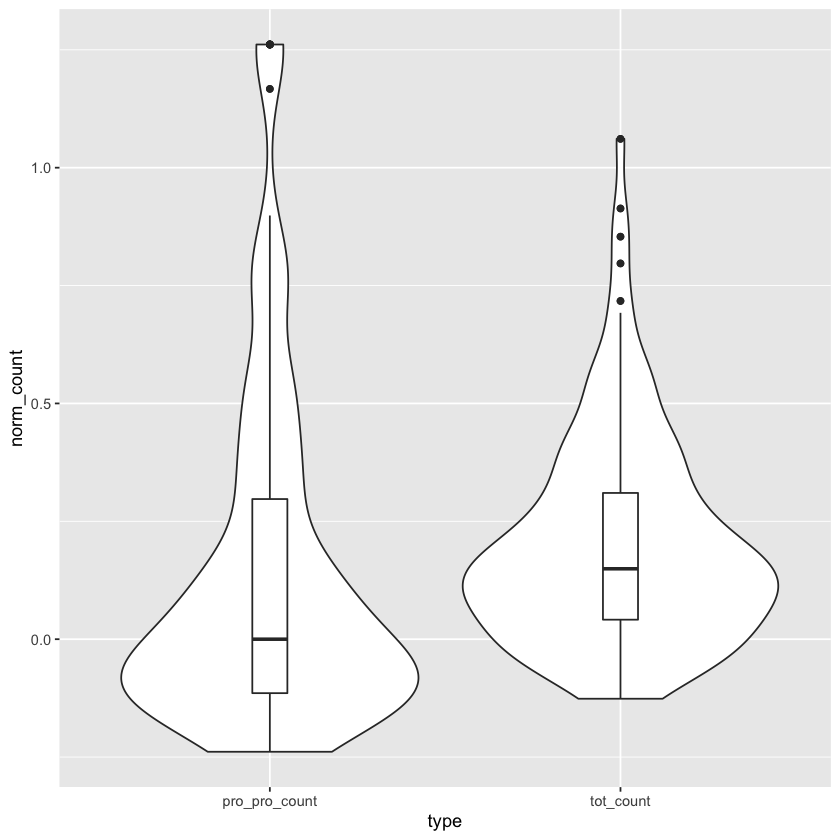

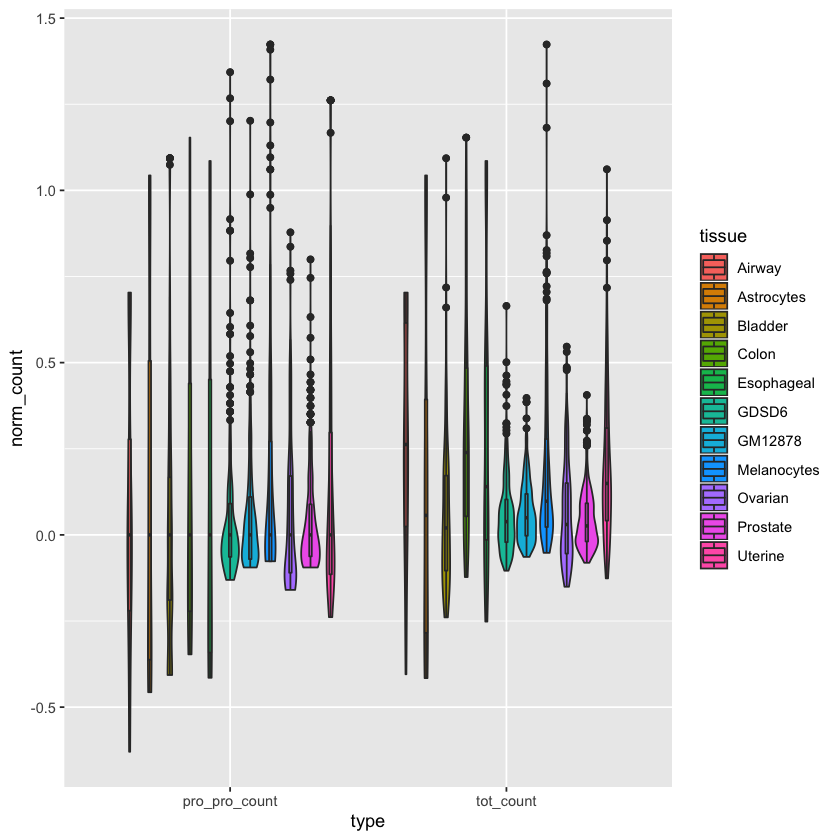

In [39]:
ggplot(df_num_df_long, aes(x=type, y=norm_count))+geom_violin() + geom_boxplot(width=0.1)
ggplot(df_num_all, aes(x=type, y=norm_count, fill=tissue))+geom_violin(position=position_dodge(width = 0.8)) + geom_boxplot(position=position_dodge(width = .8),width=0.1)#+ylim(0,2)

In [40]:
df%>%pivot_wider(id_cols='tf1',names_from='tf2',values_from='pro_pro_count')

tf1    BACH1 CBFB ETV5 FLI1 FOS FOSL2 FOXL1 HBP1 HMGA1 ⋯ SOX13 STAT1 STAT2
1  ETV5    6    NA   NA   NA   13  16     5    NA   NA    ⋯  55   NA    NA   
2  FLI1    9    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
3  NR2F1   3     3   14   NA    3   4    NA     3    7    ⋯  NA    2     3   
4  ZNF589  9    NA   NA   NA   33  34    NA    NA   NA    ⋯ 138   NA    NA   
5  KLF4   NA    17   26   NA   NA  NA    NA    NA   NA    ⋯  NA   11     8   
6  NFIC   NA     5   16   22   NA  NA     3    NA   NA    ⋯  35    5     4   
7  RFX2   NA     5    4   NA   NA  NA    NA    NA   NA    ⋯  NA    4     3   
8  SMAD3  NA     5    9   10   NA  NA     2    NA   NA    ⋯  17    2     3   
9  SNAI2  NA     4    9   NA   NA  NA     1    NA   NA    ⋯  NA    2     2   
10 BACH1  NA    NA    6    9   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
11 FOS    NA    NA   13   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
12 FOSL2  NA    NA   16   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
13 FOXL1  NA    NA    5   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
14 IRX3   NA    NA    4   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
15 JUN    NA    NA   15   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
16 JUNB   NA    NA   12   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
17 JUND   NA    NA   12   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
18 MAFF   NA    NA   10   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
19 MAFG   NA    NA    6    8   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
20 MAFK   NA    NA    4   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
21 MSX2   NA    NA   11   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
22 NFAT5  NA    NA   40   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
23 NFE2L1 NA    NA   24   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
24 NFIA   NA    NA   33   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
25 SOX13  NA    NA   55   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
26 TGIF1  NA    NA    6    4   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
27 TP63   NA    NA    8   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
28 ZFP28  NA    NA    6   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
29 CBFB   NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
30 IRF1   NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
31 IRF2   NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
32 IRF3   NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
33 MYBL2  NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
34 STAT1  NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
35 STAT2  NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
36 ZNF394 NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
37 RUNX3  NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
38 HBP1   NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
39 HMGA1  NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
40 NFATC1 NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
41 NR3C1  NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
42 UBP1   NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
43 ZBTB49 NA    NA   NA   NA   NA  NA    NA    NA   NA    ⋯  NA   NA    NA   
   TGIF1 TP63 UBP1 ZBTB49 ZFP28 ZNF394 ZNF589
1   6     8   NA   NA      6    NA      NA   
2   4    NA   NA   NA     NA    NA      NA   
3   5    NA   23    5     NA     5      25   
4  10    27   NA   NA     10    NA      NA   
5  NA    NA   NA   NA     NA     9      62   
6  NA    NA   NA   NA      2     4      33   
7  NA    NA   NA   NA     NA     2      NA   
8  NA    NA   NA   NA      3     4      19   
9  NA    NA   NA   NA     NA     4      19   
10 NA    NA   NA   NA     NA    NA       9   
11 NA    NA   NA   NA     NA    NA      33   
12 NA    NA   NA   